# DESCRIPTIVE TEXT ANALYTICS

This dataset contains tweets posted for various services and products along with the emotion contained in the tweet. It contains three columns, the tweet text, the product/service, and the emotion contained in the tweet. The tweets are used to analyze the product brand and in doing so we are conducting a sentiment analysis. Sentiment analysis is a technique used to understand the positive, negative or neutral sentiments about a particular topic. 

# Import necessary libraries. 

In [169]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#Importing dependencies. 

In [170]:
import pandas as pd
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import re
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline

#Loading the data in panda dataframe and also peforming data inspection.

In [171]:
Tweetdata =pd.read_csv("C:\pydatafiles\Tweets data.csv")
#output the shape of the data container(frame)
print("The shape of the dataframe is :\n", Tweetdata)


The shape of the dataframe is :
         id  Label  \
0        1    331   
1        2     66   
2        3     12   
3        4    338   
4        5    120   
...    ...    ...   
9086  9100      0   
9087  9101      0   
9088  9102     35   
9089  9103     52   
9090  9104      0   

                                                                                                                                             tweet_text  \
0                       .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1           @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                                       @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                                    @sxsw I hope this year's 

In [172]:
Tweetdata[Tweetdata['Label'] == 1].head(10)

,id,Label,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8,9,1,Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB,iPad or iPhone App,Positive emotion
10,11,1,Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1. #fail,Android,Positive emotion
21,35,1,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",iPad or iPhone App,Positive emotion
37,51,1,SPIN Play - a new concept in music discovery for your iPad from @mention &amp; spin.com {link} #iTunes #sxsw @mention,NaN,No emotion toward brand or product
40,54,1,@mention - Great weather to greet you for #sxsw! Still need a sweater at night..Apple putting up &quot;flash store&quot; downtown to sell iPad2,Apple,Positive emotion
42,56,1,Hey #SXSW - How long do you think it takes us to make an iPhone case? answer @mention using #zazzlesxsw and weÛªll make you one!,NaN,No emotion toward brand or product
63,77,1,"#Smile RT @mention I think Apple's &quot;pop-up store&quot; in Austin would be a lot more interesting if it actually, you know... popped up #sxsw",Apple,No emotion toward brand or product
88,102,1,"Thanks RT @mention If you're trying to contact friends or family in #Japan, @mention has created a person finder: {link} #SXSW",NaN,No emotion toward brand or product
93,107,1,Wonder if @mention &amp; @mention will be in the apple flashmob: tcrn.ch/fcs45j #SXSW #ipad2,NaN,No emotion toward brand or product
251,265,1,marketing and sales GENIUS: {link} #Apple #SXSW,Apple,Positive emotion


In [173]:
Tweetdata.columns

Index(['id', 'Label', 'tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [174]:
Tweetdata["Label"].value_counts()

0       1652
637      542
1        434
954      350
331      276
        ... 
886        1
129        1
264        1
862        1
1443       1
Name: Label, Length: 198, dtype: int64

In [175]:
Tweetdata.shape

(9091, 5)

#iii. Select data sample

In [176]:
#select a sample with a certain number of records
sampledata=Tweetdata.sample(40)
print("Data Sample\n", sampledata)

#iii b. select sample data with certain cases
#eg select only tweet texts
spam_tweet_text= sampledata["tweet_text"]

#output the shape
print("Data shape\n",spam_tweet_text)
#output sample data with spam emails
print("Data sample\n",spam_tweet_text)

Data Sample
         id  Label  \
2102  2116    112   
4412  4426     16   
5408  5422    954   
8111  8125     11   
900    914      0   
6126  6140     25   
7307  7321      0   
1780  1794      0   
8939  8953     85   
632    646     95   
5387  5401    954   
6717  6731    520   
6575  6589    123   
2765  2779     48   
6227  6241      0   
1060  1074      1   
7003  7017    123   
350    364     95   
8560  8574    203   
3964  3978     43   
8460  8474    203   
3054  3068      0   
3081  3095     16   
6052  6066      0   
696    710      0   
949    963    305   
2422  2436     88   
2679  2693      1   
8249  8263      1   
1851  1865      0   
8978  8992     35   
5847  5861    120   
1194  1208     12   
7012  7026    123   
8944  8958      0   
4592  4606     43   
7592  7606      1   
7107  7121     40   
7822  7836      0   
324    338     95   

                                                                                                                             

In [177]:
Tweetdata=Tweetdata.drop(['tweet_text','emotion_in_tweet_is_directed_at','is_there_an_emotion_directed_at_a_brand_or_product'],axis=1)
Tweetdata

,id,Label
0,1,331
1,2,66
2,3,12
3,4,338
4,5,120
...,...,...
9086,9100,0
9087,9101,0
9088,9102,35
9089,9103,52


In [178]:
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [179]:
Encoder=preprocessing.LabelEncoder()
Encoded_Tweetdata=Tweetdata.apply(preprocessing.LabelEncoder().fit_transform)
print("Transformed Data:\n",Encoded_Tweetdata)
Numeric_Array=Encoded_Tweetdata.value_counts()
print("Numeric Array\n",Numeric_Array)

Transformed Data:
         id  Label
0        0    149
1        1     62
2        2     12
3        3    150
4        4     99
...    ...    ...
9086  9086      0
9087  9087      0
9088  9088     35
9089  9089     52
9090  9090      0

[9091 rows x 2 columns]
Numeric Array
 id    Label
0     149      1
6063  33       1
6057  6        1
6058  43       1
6059  156      1
              ..
3024  7        1
3023  47       1
3022  139      1
3021  175      1
9090  0        1
Length: 9091, dtype: int64


In [180]:
from sklearn.model_selection import train_test_split

In [181]:
Training_Sample,Test_Sample=train_test_split(Numeric_Array,test_size=0.2,random_state=2)
print("Training Sample:\n",Training_Sample)
print("Test Sample:\n",Test_Sample)

Training Sample:
 id    Label
5005  5        1
7449  45       1
1415  2        1
4459  2        1
5863  10       1
              ..
6408  0        1
8398  124      1
581   72       1
8043  0        1
3559  24       1
Length: 7272, dtype: int64
Test Sample:
 id    Label
7852  52       1
2463  76       1
3476  36       1
6667  0        1
8461  88       1
              ..
357   45       1
3390  67       1
7285  59       1
1246  5        1
3331  15       1
Length: 1819, dtype: int64


In [182]:
XTrain_Sample=Training_Sample[:,1]
print("Input Attributes of Training Sample\n",XTrain_Sample)
XTest_Sample=Test_Sample[:-1]
print("Input Attributes of Test Sample\n",XTest_Sample)
XTrain_Sample.shape

Input Attributes of Training Sample
 id
1510    1
8305    1
1060    1
7762    1
8813    1
       ..
3796    1
7707    1
8720    1
4407    1
1394    1
Length: 344, dtype: int64
Input Attributes of Test Sample
 id    Label
7852  52       1
2463  76       1
3476  36       1
6667  0        1
8461  88       1
              ..
15    45       1
357   45       1
3390  67       1
7285  59       1
1246  5        1
Length: 1818, dtype: int64


(344,)

In [183]:
Tweetdata["Label"].value_counts()

0       1652
637      542
1        434
954      350
331      276
        ... 
886        1
129        1
264        1
862        1
1443       1
Name: Label, Length: 198, dtype: int64

In [184]:
#i. Create an array to store transformed data
transformed_spam=spam_tweet_text
print(transformed_spam)

2102                       Good CNN article on why #SXSW is important to social web innovators. {link} This is why I'm bringing Griddler iPad app there.
4412                               Arrived in Austin for #SXSW. Our hotel room is B.Y.O.A.P. (bring your own Apple products). My MBP, wife's iMac, iPad.
5408                            RT @mention apparently the line to get an iPad at the #sxsw store grew by 2 blocks to 5 blocks in the past 30 mins. WUT.
8111                                @mention stop by Austin Details Gallery to check out iPad art (including some of mine) {link} #SXSW interactive #Art
900                                Hey #SXSW movers and shakers, @mention is publishing a &quot;Poke the Box&quot; eBook next week. Get involved: {link}
6126    RT @mention In honor of Apple's #SXSW pop-up shop, here are some thoughts on how landlords &amp; leasing agents can utilize pop-up shops. {link}
7307                                                                              

In [185]:
#ii Coverting the cleaned sample data to lower case
transformed_spam_inlowercase= transformed_spam.str.lower()
print("Spam Description in Lower case\n\n",transformed_spam_inlowercase)

Spam Description in Lower case

 2102                       good cnn article on why #sxsw is important to social web innovators. {link} this is why i'm bringing griddler ipad app there.
4412                               arrived in austin for #sxsw. our hotel room is b.y.o.a.p. (bring your own apple products). my mbp, wife's imac, ipad.
5408                            rt @mention apparently the line to get an ipad at the #sxsw store grew by 2 blocks to 5 blocks in the past 30 mins. wut.
8111                                @mention stop by austin details gallery to check out ipad art (including some of mine) {link} #sxsw interactive #art
900                                hey #sxsw movers and shakers, @mention is publishing a &quot;poke the box&quot; ebook next week. get involved: {link}
6126    rt @mention in honor of apple's #sxsw pop-up shop, here are some thoughts on how landlords &amp; leasing agents can utilize pop-up shops. {link}
7307                                             

In [186]:
split_tweet_text=transformed_spam_inlowercase.str.split().head(10)
print("Separate words of the Transformed texts\n",split_tweet_text)

Separate words of the Transformed texts
 2102                         [good, cnn, article, on, why, #sxsw, is, important, to, social, web, innovators., {link}, this, is, why, i'm, bringing, griddler, ipad, app, there.]
4412                                   [arrived, in, austin, for, #sxsw., our, hotel, room, is, b.y.o.a.p., (bring, your, own, apple, products)., my, mbp,, wife's, imac,, ipad.]
5408                          [rt, @mention, apparently, the, line, to, get, an, ipad, at, the, #sxsw, store, grew, by, 2, blocks, to, 5, blocks, in, the, past, 30, mins., wut.]
8111                                     [@mention, stop, by, austin, details, gallery, to, check, out, ipad, art, (including, some, of, mine), {link}, #sxsw, interactive, #art]
900                                      [hey, #sxsw, movers, and, shakers,, @mention, is, publishing, a, &quot;poke, the, box&quot;, ebook, next, week., get, involved:, {link}]
6126    [rt, @mention, in, honor, of, apple's, #sxsw, pop-up, shop,, 

Tokenization is a method used to split a phrase, sentence or paragraph or the entire text document into smaller units. The essence of performing tokenization is to get individual words/terms. Each of these smaller units are called tokens. 

In [187]:
#Remove the punctuations
split_tweet_text=transformed_spam_inlowercase.str.split('').head(10)
print("Separate words of the Transformed texts\n",split_tweet_text)

Separate words of the Transformed texts
 2102    [, g, o, o, d,  , c, n, n,  , a, r, t, i, c, l, e,  , o, n,  , w, h, y,  , #, s, x, s, w,  , i, s,  , i, m, p, o, r, t, a, n, t,  , t, o,  , s, o, c, i, a, l,  , w, e, b,  , i, n, n, o, v, a, t, o...
4412    [, a, r, r, i, v, e, d,  , i, n,  , a, u, s, t, i, n,  , f, o, r,  , #, s, x, s, w, .,  , o, u, r,  , h, o, t, e, l,  , r, o, o, m,  , i, s,  , b, ., y, ., o, ., a, ., p, .,  , (, b, r, i, n, g,  ...
5408    [, r, t,  , @, m, e, n, t, i, o, n,  , a, p, p, a, r, e, n, t, l, y,  , t, h, e,  , l, i, n, e,  , t, o,  , g, e, t,  , a, n,  , i, p, a, d,  , a, t,  , t, h, e,  , #, s, x, s, w,  , s, t, o, r, e...
8111    [, @, m, e, n, t, i, o, n,  , s, t, o, p,  , b, y,  , a, u, s, t, i, n,  , d, e, t, a, i, l, s,  , g, a, l, l, e, r, y,  , t, o,  , c, h, e, c, k,  , o, u, t,  , i, p, a, d,  , a, r, t,  , (, i, n...
900     [, h, e, y,  , #, s, x, s, w,  , m, o, v, e, r, s,  , a, n, d,  , s, h, a, k, e, r, s, ,,  , @, m, e, n, t, i, o, n,  ,

Step 4: Intergrate sample data to create a text corpus. 

In [188]:
text_corpus= ["".join(text) for text in transformed_spam]
final_text_corpus=" ".join(text_corpus)
print(final_text_corpus)

Good CNN article on why #SXSW is important to social web innovators. {link} This is why I'm bringing Griddler iPad app there. Arrived in Austin for #SXSW. Our hotel room is B.Y.O.A.P. (bring your own Apple products). My MBP, wife's iMac, iPad. RT @mention apparently the line to get an iPad at the #sxsw store grew by 2 blocks to 5 blocks in the past 30 mins. WUT. @mention stop by Austin Details Gallery to check out iPad art (including some of mine) {link} #SXSW interactive #Art Hey #SXSW movers and shakers, @mention is publishing a &quot;Poke the Box&quot; eBook next week. Get involved: {link} RT @mention In honor of Apple's #SXSW pop-up shop, here are some thoughts on how landlords &amp; leasing agents can utilize pop-up shops. {link} Juicing up my iPhone. Thanks chevy volt boothe! #sxsw The iPad 2 is just a better product... They have had time to make worthwhile improvements... @mention Diller #SXSW {link} thx to @mention and @mention for this portable charger, we are now ready for #s

#step 5: Build word cloud model from the text corpus. 

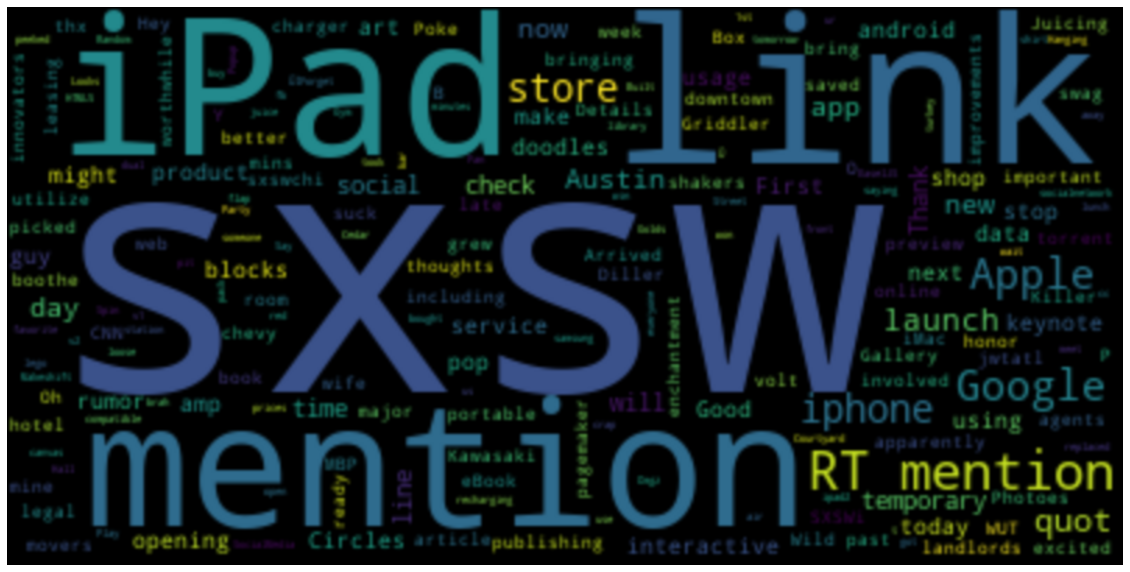

In [189]:
#i Build word cloud from text corpus
wordcloud_spam= WordCloud(background_color="black").generate(final_text_corpus)

#ii. Plot word cloud model.
plt.figure(figsize=(20,15))
plt.imshow(wordcloud_spam, cmap='BuPu', aspect='equal', alpha=1, vmin=-1,vmax=1, origin='upper', interpolation='quadric')
plt.axis("off")
plt.show()

Interpretation
Sentiment analysis is a critical technique that specifies the positive, negative or neutral sentiments about a particular product.From the word cloud, we can deduce that the customers are more likely to use SASW,google and iphone to rely their emotional.

In [190]:
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Ken
[nltk_data]    |     Bwire\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Ken
[nltk_data]    |     Bwire\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Ken
[nltk_data]    |     Bwire\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Ken
[nltk_data]    |     Bwire\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Ken
[nltk_data]    |     Bwire\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

True

In [191]:
## Tokenization
from nltk.tokenize import sent_tokenize, word_tokenize
text= "There are lots of other Google efforts helping Japan! and many other global issues. :)  RT @mention RT @mention wtf is up w/people at #sxsw SPIN Play - a new concept in music discovery for your iPad from @mention &amp; spin.com {link} #iTunes #sxsw @mention RT @mention Reactions to Google Circles news so far range from &quot;not again&quot; to &quot;please rescue me from the Facebook.&quot;  #sxsw Productivity is lost as no hookup to put iPad on the screen. #busy #sxsw @mention I just mean the percentage of iOS vs Android vs Blackberry, etc. #SXSW / @mention Live tweeting of &quot;Google and Bing Speak on Rankings begins in 10 min"
sent_tokenize(text)
word_tokenize(text)

['There',
 'are',
 'lots',
 'of',
 'other',
 'Google',
 'efforts',
 'helping',
 'Japan',
 '!',
 'and',
 'many',
 'other',
 'global',
 'issues',
 '.',
 ':',
 ')',
 'RT',
 '@',
 'mention',
 'RT',
 '@',
 'mention',
 'wtf',
 'is',
 'up',
 'w/people',
 'at',
 '#',
 'sxsw',
 'SPIN',
 'Play',
 '-',
 'a',
 'new',
 'concept',
 'in',
 'music',
 'discovery',
 'for',
 'your',
 'iPad',
 'from',
 '@',
 'mention',
 '&',
 'amp',
 ';',
 'spin.com',
 '{',
 'link',
 '}',
 '#',
 'iTunes',
 '#',
 'sxsw',
 '@',
 'mention',
 'RT',
 '@',
 'mention',
 'Reactions',
 'to',
 'Google',
 'Circles',
 'news',
 'so',
 'far',
 'range',
 'from',
 '&',
 'quot',
 ';',
 'not',
 'again',
 '&',
 'quot',
 ';',
 'to',
 '&',
 'quot',
 ';',
 'please',
 'rescue',
 'me',
 'from',
 'the',
 'Facebook.',
 '&',
 'quot',
 ';',
 '#',
 'sxsw',
 'Productivity',
 'is',
 'lost',
 'as',
 'no',
 'hookup',
 'to',
 'put',
 'iPad',
 'on',
 'the',
 'screen',
 '.',
 '#',
 'busy',
 '#',
 'sxsw',
 '@',
 'mention',
 'I',
 'just',
 'mean',
 'the',
 'p

In [192]:
#Stemming
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
print(stemmer.stem(text))

there are lots of other google efforts helping japan! and many other global issues. :)  rt @mention rt @mention wtf is up w/people at #sxsw spin play - a new concept in music discovery for your ipad from @mention &amp; spin.com {link} #itunes #sxsw @mention rt @mention reactions to google circles news so far range from &quot;not again&quot; to &quot;please rescue me from the facebook.&quot;  #sxsw productivity is lost as no hookup to put ipad on the screen. #busy #sxsw @mention i just mean the percentage of ios vs android vs blackberry, etc. #sxsw / @mention live tweeting of &quot;google and bing speak on rankings begins in 10 min


[nltk_data] Downloading package stopwords to C:\Users\Ken
[nltk_data]     Bwire\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [193]:
from nltk import pos_tag
tokens=word_tokenize(text)
pos_tag(tokens)

[('There', 'EX'),
 ('are', 'VBP'),
 ('lots', 'NNS'),
 ('of', 'IN'),
 ('other', 'JJ'),
 ('Google', 'NNP'),
 ('efforts', 'NNS'),
 ('helping', 'VBG'),
 ('Japan', 'NNP'),
 ('!', '.'),
 ('and', 'CC'),
 ('many', 'JJ'),
 ('other', 'JJ'),
 ('global', 'JJ'),
 ('issues', 'NNS'),
 ('.', '.'),
 (':', ':'),
 (')', ')'),
 ('RT', 'NNP'),
 ('@', 'NNP'),
 ('mention', 'NN'),
 ('RT', 'NNP'),
 ('@', 'NNP'),
 ('mention', 'NN'),
 ('wtf', 'NN'),
 ('is', 'VBZ'),
 ('up', 'RP'),
 ('w/people', 'RB'),
 ('at', 'IN'),
 ('#', '#'),
 ('sxsw', 'NN'),
 ('SPIN', 'NNP'),
 ('Play', 'NNP'),
 ('-', ':'),
 ('a', 'DT'),
 ('new', 'JJ'),
 ('concept', 'NN'),
 ('in', 'IN'),
 ('music', 'NN'),
 ('discovery', 'NN'),
 ('for', 'IN'),
 ('your', 'PRP$'),
 ('iPad', 'NN'),
 ('from', 'IN'),
 ('@', 'NNP'),
 ('mention', 'NN'),
 ('&', 'CC'),
 ('amp', 'NN'),
 (';', ':'),
 ('spin.com', 'CC'),
 ('{', '('),
 ('link', 'NN'),
 ('}', ')'),
 ('#', '#'),
 ('iTunes', 'NNS'),
 ('#', '#'),
 ('sxsw', 'JJ'),
 ('@', 'JJ'),
 ('mention', 'NN'),
 ('RT', 'NNP')

In [194]:
from nltk import ngrams
n=1
n=2
n=3
for gram in ngrams(word_tokenize(text),n):
    print(gram)

('There', 'are', 'lots')
('are', 'lots', 'of')
('lots', 'of', 'other')
('of', 'other', 'Google')
('other', 'Google', 'efforts')
('Google', 'efforts', 'helping')
('efforts', 'helping', 'Japan')
('helping', 'Japan', '!')
('Japan', '!', 'and')
('!', 'and', 'many')
('and', 'many', 'other')
('many', 'other', 'global')
('other', 'global', 'issues')
('global', 'issues', '.')
('issues', '.', ':')
('.', ':', ')')
(':', ')', 'RT')
(')', 'RT', '@')
('RT', '@', 'mention')
('@', 'mention', 'RT')
('mention', 'RT', '@')
('RT', '@', 'mention')
('@', 'mention', 'wtf')
('mention', 'wtf', 'is')
('wtf', 'is', 'up')
('is', 'up', 'w/people')
('up', 'w/people', 'at')
('w/people', 'at', '#')
('at', '#', 'sxsw')
('#', 'sxsw', 'SPIN')
('sxsw', 'SPIN', 'Play')
('SPIN', 'Play', '-')
('Play', '-', 'a')
('-', 'a', 'new')
('a', 'new', 'concept')
('new', 'concept', 'in')
('concept', 'in', 'music')
('in', 'music', 'discovery')
('music', 'discovery', 'for')
('discovery', 'for', 'your')
('for', 'your', 'iPad')
('your', 

In [2]:
from nltk.corpus import wordnet
wordnet.synsets("to")

[]